In [4]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from models import *
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f'Using device: {device}')

Using device: mps


In [2]:
def count_valid_files(directory):
    return sum(1 for filename in os.listdir(directory) if not filename.startswith('.') and os.path.isfile(os.path.join(directory, filename)))

image_data_dir = './Image_data/DATASET/train'
image_lengths = {subdir: count_valid_files(os.path.join(image_data_dir, subdir)) for subdir in os.listdir(image_data_dir) if not subdir.startswith('.') and os.path.isdir(os.path.join(image_data_dir, subdir))}

adjacency_dir = './output_data/adjacency'
adjacency_lengths = {subdir: count_valid_files(os.path.join(adjacency_dir, subdir)) for subdir in os.listdir(adjacency_dir) if not subdir.startswith('.') and os.path.isdir(os.path.join(adjacency_dir, subdir))}

print("Image data lengths:")
print(image_lengths)

print("Adjacency data lengths:")
print(adjacency_lengths)

Image data lengths:
{'7': 2524, '6': 705, '1': 1290, '4': 4772, '3': 717, '2': 281, '5': 1982}
Adjacency data lengths:
{'adjacency_2': 241, 'adjacency_5': 664, 'adjacency_4': 1915, 'adjacency_3': 256, 'adjacency_6': 524, 'adjacency_1': 1165, 'adjacency_7': 2127}


In [14]:
image_df = pd.DataFrame(list(image_lengths.items()), columns=['Category', 'Image Count'])
adjacency_df = pd.DataFrame(list(adjacency_lengths.items()), columns=['Category', 'Adjacency Count'])
adjacency_df['Category'] = adjacency_df['Category'].str.extract(r'(\d+)')

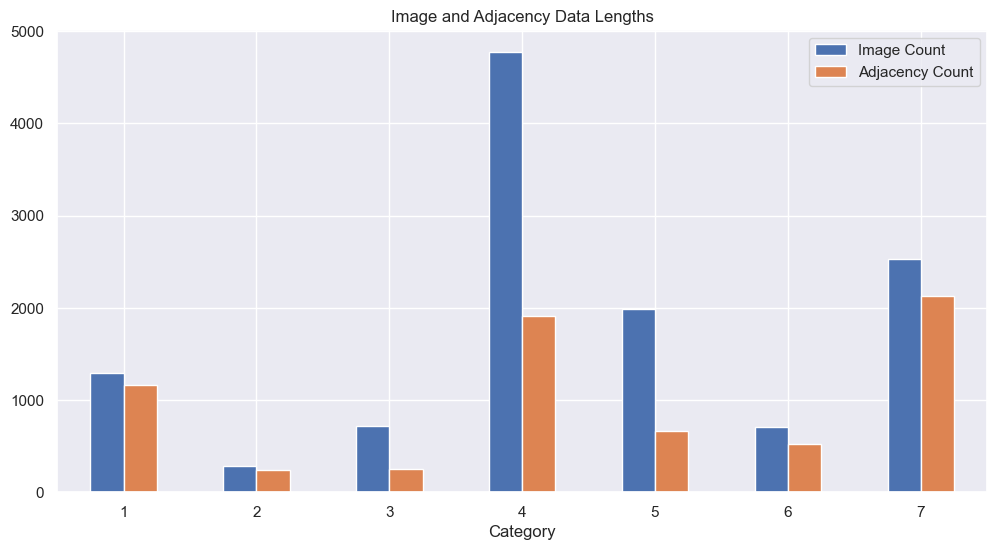

In [17]:
comparison_df = pd.merge(image_df, adjacency_df, on='Category', how='outer')
# plot, don't rotate x-axis labels, and make it look nice
sns.set_theme()
comparison_df.plot(x='Category', kind='bar', figsize=(12, 6))
plt.xticks(rotation=0)
plt.title('Image and Adjacency Data Lengths')
plt.show()

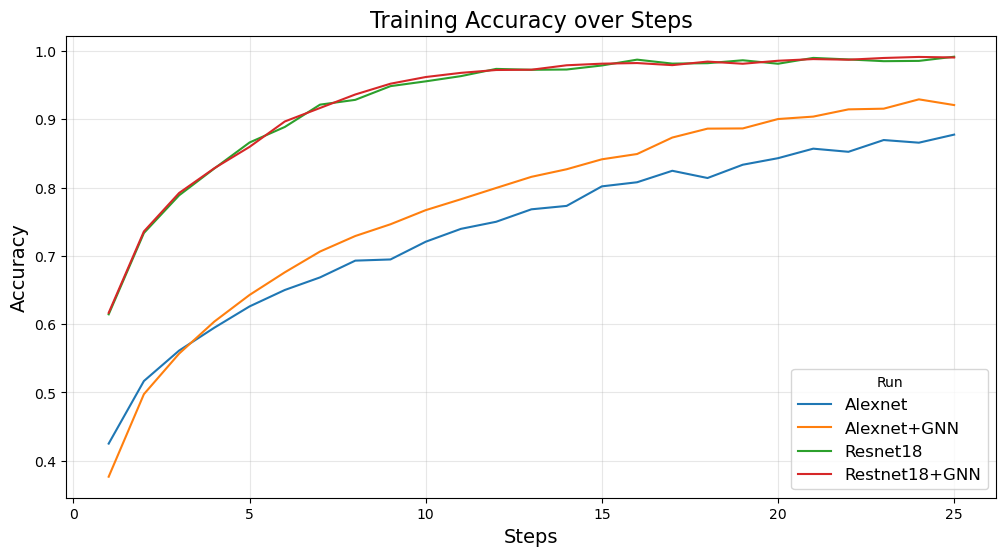

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = 'mlflow/train_accuracy.csv'
data = pd.read_csv(file_path)

# 筛选数据并按照 `Run` 分组
grouped_data = data.groupby('Run')

# 绘制图表
plt.figure(figsize=(12, 6))
for name, group in grouped_data:
    plt.plot(group['step'], group['value'], label=name)

# 添加图例和标题
plt.title('Training Accuracy over Steps', fontsize=16)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(title='Run', fontsize=12)
plt.grid(alpha=0.3)
plt.show()
